In [55]:
import random
import numpy as np
import tqdm 
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt
import re

capacity = 200
temperature = 1000 
alpha = 0.99 # cooling hyperparameter
HUGE = 999999
early_unit_cost = 0
late_unit_cost = HUGE

best_sol = None


class Node:
    def __init__(self):
        self.name = None
        self.x = None
        self.y = None
        self.demand = None
        self.ready = None
        self.due = None
        self.service = None


class Sol:
    def __init__(self):
        self.path = []
        self.node = []
        self.cost=None

def read_data():
    sol = Sol()
    file_path = 'c101.txt'
    data = open(file_path, 'r')

    lines = data.readlines() 
    lines = lines[9:35] 
    
    for line in lines:
        elements = re.findall('[0-9]+',line)
        node = Node()
        node.name = int(elements[0])
        node.x = int(elements[1])
        node.y = int(elements[2])
        node.demand = int(elements[3])
        node.ready = int(elements[4])
        node.due = int(elements[5])
        node.service = int(elements[6])
        sol.node.append(node)
 
    return sol

In [56]:
def init_code(sol):
    sol.path = sol.node[1:]
    random.shuffle(sol.path) # random shuffle customers
    sum_demand = 0
    cur_path = []
    for i in range(len(sol.path)): 
        sum_demand += sol.path[i].demand # only consider weight
        if sum_demand > capacity: # if exceed capacity, add depot 0& start new route
            cur_path.append(sol.node[0]) 
            sum_demand=sol.path[i].demand
        cur_path.append(sol.path[i])
    sol.path=cur_path
    sol.path.append(sol.node[0]) # add depot 0 at the end
    sol.path.insert(0,sol.node[0]) # add depot 0 at the begining



def get_distance(x1, y1, x2, y2):
    return np.hypot(x1 - x2, y1 - y2)


def get_cost(sol):
    total_cost=0
    distance_cost=0
    early_cost=0
    late_cost=0
    sum_demand=0
    now_time=0
    for i in range(len(sol.path)): # for each point
        if i==0: # beginning depot
            continue
        # distance cost
        distance=get_distance(sol.path[i-1].x,sol.path[i-1].y,sol.path[i].x,sol.path[i].y)
        distance_cost+=distance
        now_time+=distance # update now time
        sum_demand+=sol.path[i].demand # update load
        if sum_demand>capacity: # load cost = 999999
            total_cost+=HUGE
        if now_time<sol.path[i].ready: # early cost = 0
            early_cost+=(sol.path[i].ready-now_time)* early_unit_cost #0
            now_time=sol.path[i].ready # update now time
            
        if now_time>sol.path[i].due: # late cost = 999999
            late_cost += (now_time-sol.path[i].due) * late_unit_cost
        now_time+=sol.path[i].service # update now time
        
        if sol.path[i].name==0:# new route: then reset now time&load
            now_time=0 
            sum_demand=0
    total_cost+=distance_cost+early_cost+late_cost
    sol.cost=total_cost
    
    return total_cost

        
def change(sol): # change two node
    pos1 = random.randint(1,len(sol.path)-2)
    pos2 = random.randint(1,len(sol.path)-2)
    sol.path[pos1], sol.path[pos2] = sol.path[pos2], sol.path[pos1] 

def local_search(sol):
    global best_sol 
    temp_sol = copy.deepcopy(sol) # create placeholder
    temp2_sol = copy.deepcopy(sol) 
    for i in range(10): # inside loop
        change(temp2_sol)
        # record current best in 10 loop
        if get_cost(temp2_sol)<get_cost(temp_sol): 
            temp_sol = copy.deepcopy(temp2_sol) 
    
    c1 = get_cost(temp_sol) # best cost in 10 loops
    c2 = get_cost(sol) # cost of initial sol
    if c1<c2: # update initial sol
        if c1<best_sol.cost: # update best_sol 
            best_sol = temp_sol
        sol = temp_sol
    else: # if temperature allows, still update initial sol
        if np.exp((c2-c1)/temperature) > random.random(): 
            sol = temp_sol
            
    return sol
        
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
        


def plot(sol):
    temp_path_x=[sol.path[0].x]
    temp_path_y=[sol.path[0].y]
    for i in range(len(sol.path)):
        if i==0:
            continue
        temp_path_x.append(sol.path[i].x)
        temp_path_y.append(sol.path[i].y)
        if sol.path[i].name==0:
            plt.plot(temp_path_x,temp_path_y)
            temp_path_x=[sol.path[i].x]
            temp_path_y=[sol.path[i].y]
    plt.show()
        

20986437532.825382


100%|██████████████████████████████████████| 2000/2000 [00:05<00:00, 394.13it/s]


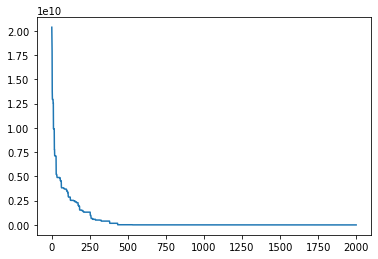

In [74]:
sol = read_data()
init_code(sol)
print(get_cost(sol))
best_sol= copy.deepcopy(sol)


cost =[]
for i in tqdm(range(2000)):
    sol = local_search(sol)
    cost.append(sol.cost)
    temperature = alpha*temperature # cooling


plt.plot(cost)

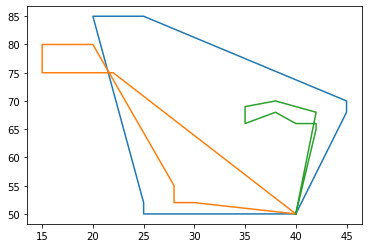

[0, 20, 24, 25, 16, 14, 12, 2, 1, 0, 13, 17, 18, 19, 15, 23, 22, 21, 0, 5, 3, 7, 8, 10, 11, 9, 6, 4, 0]


243.6227805963989

In [75]:
plot(best_sol)

print([best_sol.path[i].name for i in range(len(best_sol.path))])

best_sol.cost